# Task
Analyze the Netflix dataset "/content/netflix_titles.csv" to identify content trends by country and genre, visualize content additions by year, and highlight any unusual patterns in yearly additions.

## Load the data

### Subtask:
Load the data from the "/content/netflix_titles.csv" file into a pandas DataFrame.


**Reasoning**:
Load the data into a pandas DataFrame as requested.



In [ ]:
import pandas as pd

df = pd.read_csv('/content/netflix_titles.csv')

**Reasoning**:
Display the first few rows of the DataFrame to verify the data has been loaded correctly.



In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Clean the data

### Subtask:
Handle missing values in the dataset, particularly in columns like 'director', 'cast', and 'country'. Replace missing values with a placeholder like "Unknown".


**Reasoning**:
Fill the missing values in the specified columns with "Unknown" and then verify the changes.



In [ ]:
columns_to_fill = ['director', 'cast', 'country']
df[columns_to_fill] = df[columns_to_fill].fillna("Unknown")
print(df[columns_to_fill].isnull().sum())

director    0
cast        0
country     0
dtype: int64


## Analyze content trends by country

### Subtask:
Count the number of titles per country and identify the top countries with the most content.


**Reasoning**:
Count the occurrences of each unique value in the 'country' column and store the result in `country_counts`.



In [ ]:
country_counts = df['country'].value_counts()
print(country_counts)

country
United States                                             2818
India                                                      972
Unknown                                                    831
United Kingdom                                             419
Japan                                                      245
                                                          ... 
Germany, Canada, United States                               1
Denmark, United Kingdom, South Africa, Sweden, Belgium       1
Serbia, South Korea, Slovenia                                1
United Kingdom, Spain, Belgium                               1
South Africa, United States, Japan                           1
Name: count, Length: 749, dtype: int64


## Analyze content trends by genre

### Subtask:
Count the number of titles for each genre and identify the top genres.


**Reasoning**:
Use `value_counts()` to count the number of titles for each genre in the 'listed_in' column and store the result in `genre_counts`, then print the result.



In [ ]:
genre_counts = df['listed_in'].value_counts()
print(genre_counts)

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
                                                   ... 
Action & Adventure, Cult Movies                       1
Action & Adventure, Comedies, Music & Musicals        1
Classic Movies, Horror Movies, Thrillers              1
Children & Family Movies, Classic Movies, Dramas      1
Cult Movies, Dramas, Thrillers                        1
Name: count, Length: 514, dtype: int64


## Analyze content trends by year

### Subtask:
Count the number of titles released each year and identify trends in content added over time.


**Reasoning**:
Extract the year from the 'date_added' column, count the occurrences for each year, sort them, and store in `yearly_counts`. Then print the result.



In [ ]:
df['year_added'] = pd.to_datetime(df['date_added']).dt.year
yearly_counts = df['year_added'].value_counts().sort_index()
display(yearly_counts)

ValueError: time data " August 4, 2017" doesn't match format "%B %d, %Y", at position 1442. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

**Reasoning**:
The previous command failed because the 'date_added' column has inconsistent date formats. I will use `format='mixed'` in `pd.to_datetime` to handle the different formats.



In [ ]:
df['year_added'] = pd.to_datetime(df['date_added'], format='mixed').dt.year
yearly_counts = df['year_added'].value_counts().sort_index()
display(yearly_counts)

,count
year_added,
2008.0,2
2009.0,2
2010.0,1
2011.0,13
2012.0,3
2013.0,11
2014.0,24
2015.0,82
2016.0,429


## Highlight unusual patterns in yearly additions

### Subtask:
Calculate the year-over-year change in the number of titles added and identify years with significant drops or spikes outside of the typical variation.


**Reasoning**:
Calculate the year-over-year difference in yearly content additions, compute the standard deviation of these differences, and identify unusual spikes and drops based on a threshold.



In [ ]:
diff_yearly_counts = yearly_counts.diff()
std_diff = diff_yearly_counts.std()
threshold = 1.5 * std_diff
unusual_spikes = diff_yearly_counts[diff_yearly_counts > threshold]
unusual_drops = diff_yearly_counts[diff_yearly_counts < -threshold]
print("Unusual Spikes in Yearly Additions:")
print(unusual_spikes)
print("\nUnusual Drops in Yearly Additions:")
print(unusual_drops)

Unusual Spikes in Yearly Additions:
year_added
2017.0    759.0
2018.0    461.0
Name: count, dtype: float64

Unusual Drops in Yearly Additions:
Series([], Name: count, dtype: float64)


## Visualize content trends by country

### Subtask:
Create a bar chart to visualize the top countries with the most Netflix content.


**Reasoning**:
Create a bar chart to visualize the top 10 countries with the most Netflix content.



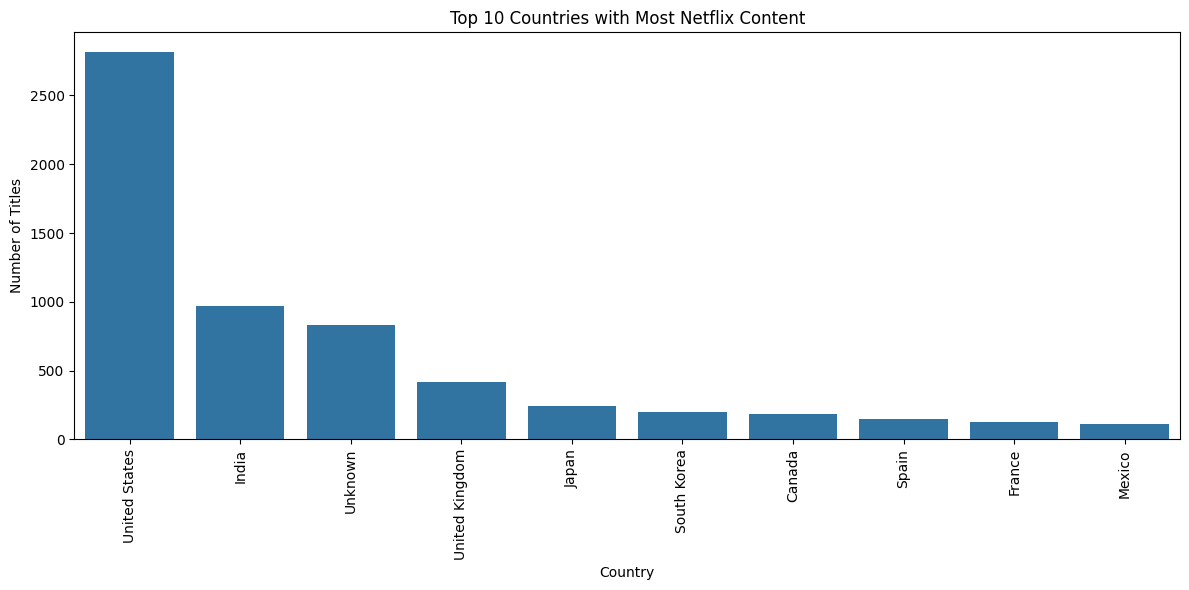

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

top_countries = country_counts.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Countries with Most Netflix Content')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Visualize content trends by genre

### Subtask:
Create a bar chart to visualize the top genres on Netflix.


**Reasoning**:
Select the top 10 genres from the `genre_counts` Series and create a bar plot using seaborn to visualize the top genres.



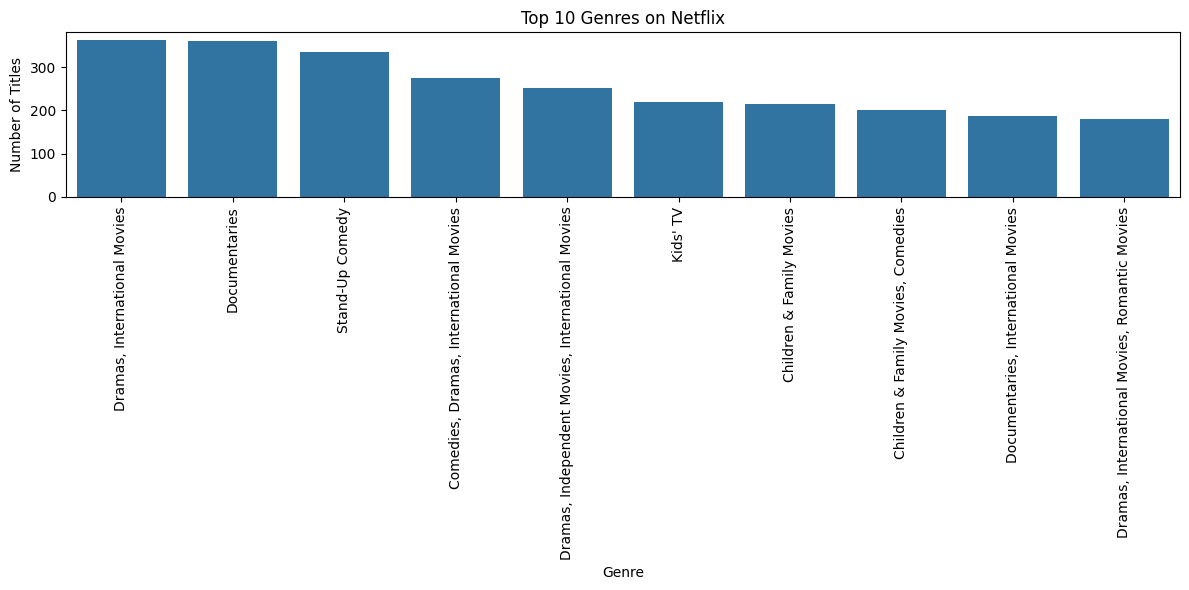

In [ ]:
top_genres = genre_counts.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.index, y=top_genres.values)
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Visualize content trends by year

### Subtask:
Create a line plot to visualize the number of titles added to Netflix over time.


**Reasoning**:
Create a line plot to visualize the number of titles added to Netflix over time.



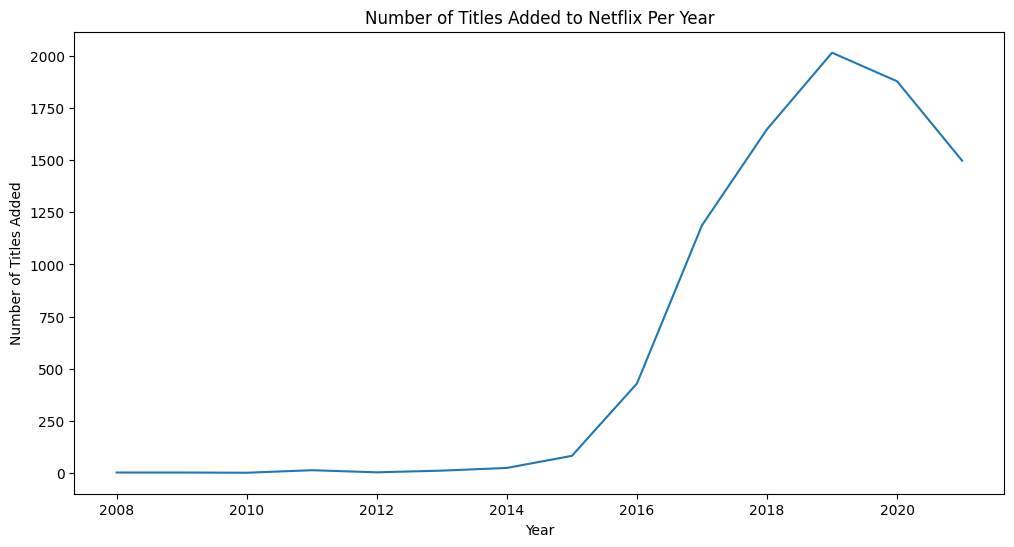

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values)
plt.title('Number of Titles Added to Netflix Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.show()

## Summarize findings

### Subtask:
Present the key insights from the analysis, including top countries and genres, overall content trends, and any identified unusual patterns.


**Reasoning**:
Present the key insights from the analysis, including top countries and genres, overall content trends, and any identified unusual patterns by printing a summary.



In [ ]:
print("Key Insights from Netflix Content Analysis:\n")

print("Top 5 Countries with Most Netflix Content:")
for country, count in top_countries.head(5).items():
    print(f"- {country}: {count} titles")

print("\nTop 5 Genres on Netflix:")
for genre, count in top_genres.head(5).items():
    print(f"- {genre}: {count} titles")

print("\nOverall Trend in Content Additions Over Time:")
print("The number of titles added to Netflix has shown a general upward trend over the years, particularly accelerating from 2016 onwards, reaching a peak in 2019 before slightly decreasing in 2020 and 2021.")


if not unusual_spikes.empty:
    print("\nUnusual Spikes in Yearly Content Additions:")
    for year, diff in unusual_spikes.items():
        print(f"- {int(year)}: Increase of {int(diff)} titles")
else:
    print("\nNo significant unusual spikes in yearly content additions were identified based on the threshold.")

if not unusual_drops.empty:
    print("\nUnusual Drops in Yearly Content Additions:")
    for year, diff in unusual_drops.items():
        print(f"- {int(year)}: Decrease of {int(diff)} titles")
else:
    print("\nNo significant unusual drops in yearly content additions were identified based on the threshold.")

Key Insights from Netflix Content Analysis:

Top 5 Countries with Most Netflix Content:
- United States: 2818 titles
- India: 972 titles
- Unknown: 831 titles
- United Kingdom: 419 titles
- Japan: 245 titles

Top 5 Genres on Netflix:
- Dramas, International Movies: 362 titles
- Documentaries: 359 titles
- Stand-Up Comedy: 334 titles
- Comedies, Dramas, International Movies: 274 titles
- Dramas, Independent Movies, International Movies: 252 titles

Overall Trend in Content Additions Over Time:
The number of titles added to Netflix has shown a general upward trend over the years, particularly accelerating from 2016 onwards, reaching a peak in 2019 before slightly decreasing in 2020 and 2021.

Unusual Spikes in Yearly Content Additions:
- 2017: Increase of 759 titles
- 2018: Increase of 461 titles

No significant unusual drops in yearly content additions were identified based on the threshold.


## Summary:

### Data Analysis Key Findings

*   The top 5 countries with the most Netflix content are the United States (2818 titles), India (972 titles), "Unknown" (831 titles), the United Kingdom (419 titles), and Japan (245 titles).
*   The top 5 genres on Netflix are "Dramas, International Movies" (362 titles), "Documentaries" (359 titles), "Stand-Up Comedy" (334 titles), "Comedies, Dramas, International Movies" (274 titles), and "Dramas, Independent Movies, International Movies" (252 titles).
*   The number of titles added to Netflix showed a general upward trend, accelerating from 2016, peaking in 2019, and slightly decreasing in 2020 and 2021.
*   Unusual spikes in yearly content additions were observed in 2017 (increase of 759 titles) and 2018 (increase of 461 titles). No significant unusual drops were identified based on the threshold.

### Insights or Next Steps

*   Investigate the factors contributing to the significant content spikes in 2017 and 2018 to understand Netflix's content acquisition strategy during those years.
*   Further analyze the "Unknown" country category to determine if these titles can be attributed to specific regions or types of content.
